***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [11]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates_NON_LAT_00.csv','Atomic.csv','Stoich.csv','Param_nonlat.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[1e-5*1e-4,0.1*1e-4, 1e-9]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 1
Kinetic_Info = fit.Input
time = Kinetic_Info.values[:,0]

Mass is conserved. 

CPU times: user 29 ms, sys: 10.8 ms, total: 39.8 ms
Wall time: 38.1 ms


/Users/klkusima/Desktop/RASH_Research/CO_ox/Kinetics/OOP_Kinetics/MiKi/OOP7_Curve_Fit_OPTIM/main.py:222: RuntimeWarning: divide by zero encountered in double_scalars
  Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(St_No[i])) #Calculating overal reaction equilibrium constant from k (rate constants)
/Users/klkusima/Desktop/RASH_Research/CO_ox/Kinetics/OOP_Kinetics/MiKi/OOP7_Curve_Fit_OPTIM/main.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  Keq_k = Keq_k * ((kf[i]/kr[i]) ** float(St_No[i]))


In [12]:
# kconsts = np.array([9.383,1.13799e-10,6.596e6,2.23593e4,1.29e8,6.2904e2,6.4124,9.291e6])
# fit.MKM.k = kconsts

In [21]:
fit.MKM.k

array([8.30e+02, 5.58e-02, 7.77e+06, 4.55e+09, 1.36e+05, 4.61e-11,
       1.14e+00, 0.00e+00])

In [14]:
fit.MKM.set_rxnconditions(Pr=[1e-5*1e-4,0.1*1e-4, 0]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.MKM.set_limits_of_integration(Ti = fit.Input.iloc[0,0], Tf = fit.Input.iloc[-1,0])
fit.MKM.Tf = fit.Input.iloc[-1,0]
fit.MKM.set_initial_coverages(init=[0,0,0,1])
fit.MKM.Thermo_Constraint = 'OFF'
fit.MKM.rate_const_correction='None'

Kinetic_Info = fit.Input
time = Kinetic_Info.values[:,0]

In [15]:
fit.MKM.k
# MKM.P = [1.0e-4*1e-5,1.0e-4*0.1, 0]
# fit.MKM.k[0] = 8.30e-02
# fit.MKM.k[7] = 7.77e+02

array([8.30e+02, 5.58e-02, 7.77e+06, 4.55e+09, 1.36e+05, 4.61e-11,
       1.14e+00, 0.00e+00])

<IPython.core.display.Javascript object>


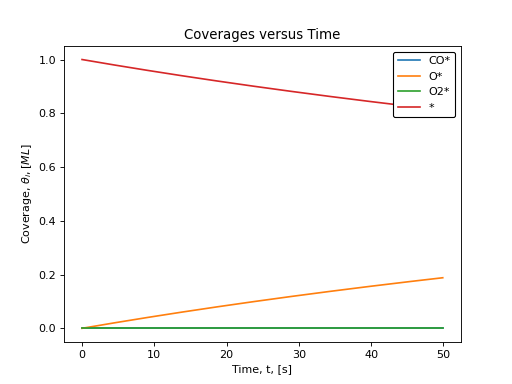

In [16]:
modrate,mod_time= fit.MKM.solve_rate_production(Tf_eval=time,plot=False)
modcovg,mod_time= fit.MKM.solve_coverage(Tf_eval=time,plot=True)

In [17]:
MKM_fit = modrate
MKM_covg = modcovg

<IPython.core.display.Javascript object>


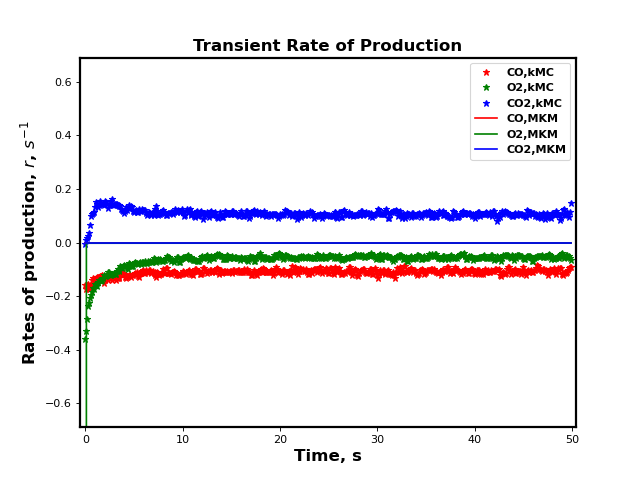

In [20]:
fig= plt.figure(figsize = (8, 6), linewidth=25)
ax = fig.gca()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(2)
    
plt.plot(time, Kinetic_Info.values[:,5],'r*', label=r'CO,kMC')        
plt.plot(time, Kinetic_Info.values[:,6],'g*', label=r'O2,kMC') 
plt.plot(time, Kinetic_Info.values[:,7], 'b*', label='CO2,kMC') 

# plt.plot(time, MKM_nonfit[:,0],'ro', label='CO,MKM')        
# plt.plot(time, MKM_nonfit[:,1],'go', label='O2,MKM') 
# plt.plot(time, MKM_nonfit[:,2], 'bo', label='CO2,MKM') 

plt.plot(time, MKM_fit[:,0],'r-', label='CO,MKM')        
plt.plot(time, MKM_fit[:,1],'g-', label='O2,MKM') 
plt.plot(time, MKM_fit[:,2], 'b-', label='CO2,MKM') 

plt.xlabel('Time, s', fontsize = 15, fontweight="bold")
plt.ylabel("Rates of production, $r$, $s^{-1}$", fontsize = 15, fontweight="bold")
plt.title('Transient Rate of Production', fontsize = 15, fontweight="bold")
plt.legend(fontsize=12, loc='best',prop={'weight':'bold'})
plt.show()

<IPython.core.display.Javascript object>


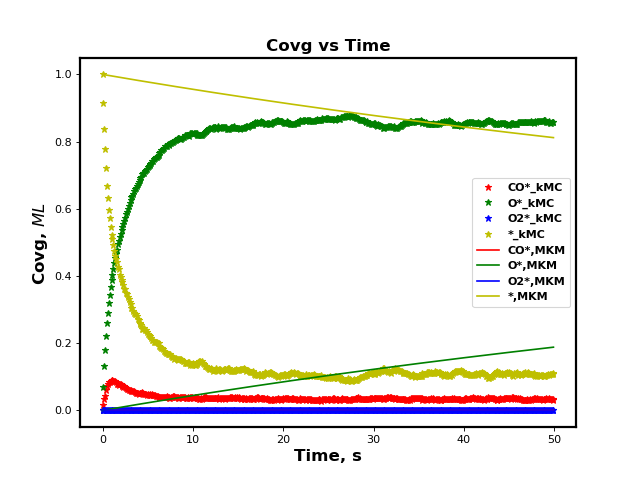

In [19]:
fig= plt.figure(figsize = (8, 6), linewidth=25)
ax = fig.gca()
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(2)
    
plt.plot(time, Kinetic_Info.values[:,1],'r*', label='CO*_kMC')        
plt.plot(time, Kinetic_Info.values[:,2],'g*', label='O*_kMC') 
plt.plot(time, Kinetic_Info.values[:,3], 'b*', label='O2*_kMC') 
plt.plot(time, Kinetic_Info.values[:,4], 'y*', label='*_kMC') 

# plt.plot(time, MKM_nonfit[:,0],'ro', label='CO,MKM')        
# plt.plot(time, MKM_nonfit[:,1],'go', label='O2,MKM') 
# plt.plot(time, MKM_nonfit[:,2], 'bo', label='CO2,MKM') 

plt.plot(time, MKM_covg[:,0],'r-', label='CO*,MKM')        
plt.plot(time, MKM_covg[:,1],'g-', label='O*,MKM') 
plt.plot(time, MKM_covg[:,2], 'b-', label='O2*,MKM') 
plt.plot(time, MKM_covg[:,3], 'y-', label='*,MKM') 

plt.xlabel('Time, s', fontsize = 15, fontweight="bold")
plt.ylabel("Covg, $ML$ ", fontsize = 15, fontweight="bold")
plt.title('Covg vs Time', fontsize = 15, fontweight="bold")
plt.legend(fontsize=12, loc='best',prop={'weight':'bold'})
plt.show()

In [84]:
#a = [1e-3,1e-2,1e-4,1e5,1e5,1e-2,1e3,1e4]
#Fitting for Model 1: (without CD) #using curve_fit
#fit.k = a

In [9]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',method_cf = 'trf', maxfev=1e6,xtol=1e-8,ftol=1e-8,plot=True) 
kfit1 = fit.fitted_k


50.0 % of the Input dataset is being extracted for fitting (i.e For each species, 250 points are being extracted for fitting)

Performing fitting using optimize.curve_fit:
--------------------------------------------------
-Using Method: trf


KeyboardInterrupt: 

In [10]:
fit.P

[mpf('0.0000000010000000000000000622815914577798564188970686927859788'),
 mpf('0.000010000000000000000818030539140313095458623138256371021'),
 mpf('0.0')]

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
t1,covg1,fits1 = fit.fitting_rate_param(option='cf',method_cf='lm',plot=True) 
kfit2 = fit.fitted_k

ValueError: Method 'lm' only works for unconstrained problems. Use 'trf' or 'dogbox' instead.

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# TRYING OUT ML K Fitting

In [12]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('KMC_NonDynamic_Data_iCovg_iRates.csv','Atomic.csv','Stoich.csv','Param.csv',Input_Type='iCovg_iRates') 
fit.set_rxnconditions(Pr=[(1.0e-4*1.0e-5), (1.0e-4*0.1), 0]) #Sets the Pressures and Temperature as defined from the Param file. (Note: One can also enter them manually - See main.py for syntax #Note order corresponds to stoich matrix P orders)
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

In [14]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t2,covg2,fits2 = fit.fitting_rate_param(option='ML',plot=True) 
kfit2 = fit.fitted_k


KeyboardInterrupt



In [15]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t3,covg3,fits3 = fit.fitting_rate_param(option='ML',mdl='KNeighborsRegressor',plot=True) 
kfit3 = fit.fitted_k

KeyboardInterrupt: 

In [16]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t4,covg4,fits4 = fit.fitting_rate_param(option='ML',mdl='DecisionTreeRegressor',plot=True) 
kfit4 = fit.fitted_k


KeyboardInterrupt



In [17]:
%%time 
# Options: MLPRegressor,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor
#Fitting for Model 1: (without CD) #using curve_fit
t5,covg5,fits5 = fit.fitting_rate_param(option='ML',mdl='RandomForestRegressor',plot=True) 
kfit5 = fit.fitted_k

KeyboardInterrupt: 